### Logistic Regression (Perception trick)

In [14]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,
                          n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [15]:
import matplotlib.pyplot as plt

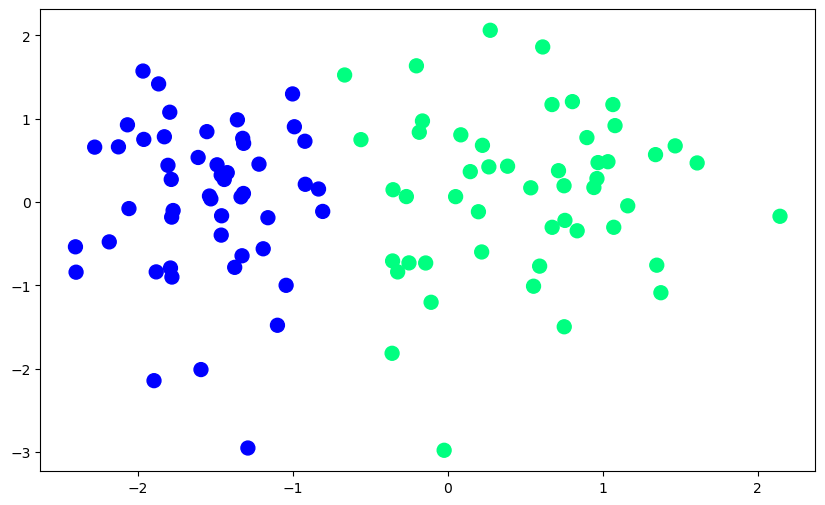

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter', s=100)

In [17]:
def step(z):
    return 1 if z>0 else 0

In [37]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)   #inserting a row before x column
    weights = np.ones(X.shape[1]) #initial weights of all columns is 1
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)  #pick the random column
        y_hat = step(np.dot(X[j],weights)) #calculate the y_hat and decide whether it is 0 or 1
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [38]:
intercept_,coef_ = perceptron(X,y)

In [39]:
print(coef_)
print(intercept_)

[1.35626184 0.04463022]
0.9


In [40]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [42]:
X_input = np.linspace(-3,3,100)
y_input = m * X_input + b

(-3.0, 2.0)

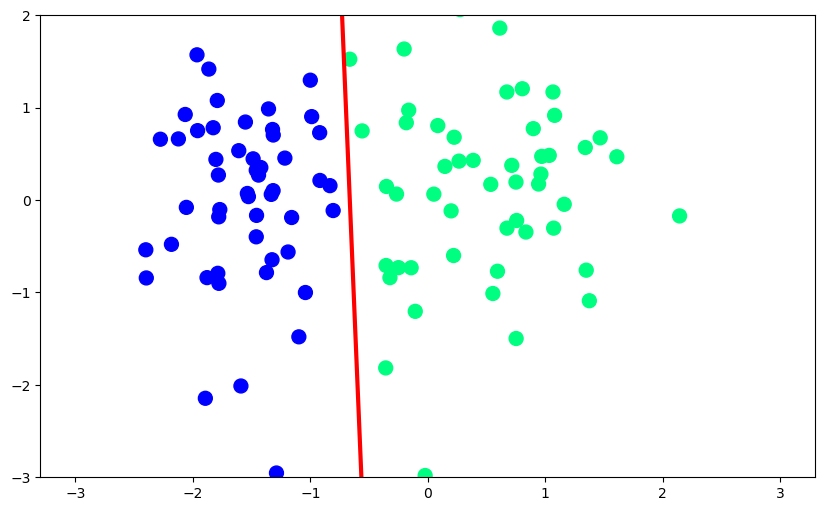

In [43]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [46]:
def perceptron(X,y):
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

In [47]:
m,b = perceptron(X,y)

In [62]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [63]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>